In [1]:
!python --version

Python 3.10.9


In [15]:
import adelio            as aio
import matplotlib.pyplot as plt
import numpy             as np
import os
import preprocessing     as pre

To begin with, prepare an experimental sample.

Eyy description :
-----------------
shape : (1328, 211)
type  : float64
NaN   : False
min   : -0.00422234079063837
max   : 0.14902287963103
mean  : 0.009779571056074209
std   : 0.016349865239292535

Img description :
-----------------
shape : (1328, 1328)
type  : float64
NaN   : False
min   : -0.00422234079063837
max   : 0.14902287963103
mean  : 0.00977957105607421
std   : 0.006517129751071644


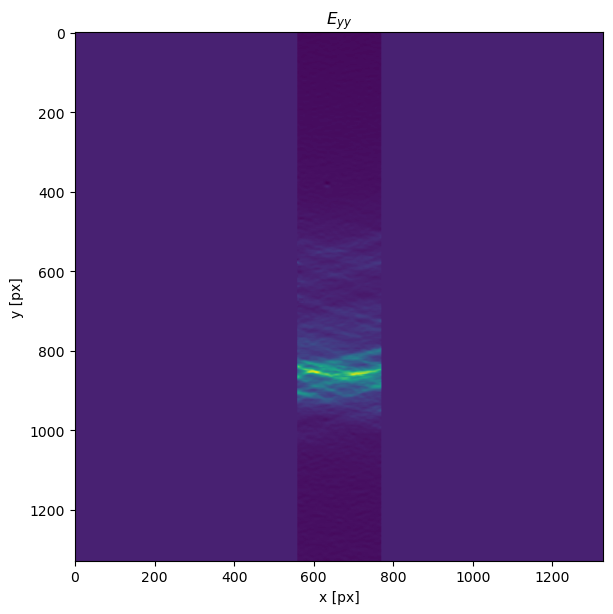

In [3]:
path = os.path.join("C:\\Users", "julie", "Documents", "experiences", "S18_Eyy_point679.csv")
eyy  = np.genfromtxt( path, delimiter=',' )
eyy  = eyy[np.logical_not(np.isnan(eyy).any(axis=1))]

print("Eyy description :")
print("-----------------")
print(f"shape : {eyy.shape}")
print(f"type  : {eyy.dtype}")
print(f"NaN   : {np.any(np.isnan(eyy))}")
print(f"min   : {np.nanmin(eyy)}")
print(f"max   : {np.nanmax(eyy)}")
print(f"mean  : {np.nanmean(eyy)}")
print(f"std   : {np.nanstd(eyy)}")

l = min(eyy.shape)
L = max(eyy.shape)
eyy_img = np.ones((L,L), dtype=np.float64) *np.nanmean(eyy)
eyy_img[:, (L-l)//2:(L+l)//2] = eyy

print()
print("Img description :")
print("-----------------")
print(f"shape : {eyy_img.shape}")
print(f"type  : {eyy_img.dtype}")
print(f"NaN   : {np.any(np.isnan(eyy_img))}")
print(f"min   : {np.nanmin(eyy_img)}")
print(f"max   : {np.nanmax(eyy_img)}")
print(f"mean  : {np.nanmean(eyy_img)}")
print(f"std   : {np.nanstd(eyy_img)}")

fig = plt.figure(figsize=(15,15))
axe = fig.add_subplot(1, 2, 1)
axe.imshow(eyy_img)
axe.set_xlabel("x [px]")
axe.set_ylabel("y [px]")
axe.set_title("$E_{yy}$")
plt.show()

Secondly, set up a field coming from a simulation, for instance $I_{2|\varepsilon}(t_f)$ with the numerical sim 

- `~/test_deia_Nov2022/E10_rect_P2_0.5GPa_init1_neigh1_time10_dtup5000_500000_1000K_Zfree_WR7_4e_6_PNew1.5e9_long`

In [16]:
basepath = os.path.join("C:\\Users", "julie", "Documents", "test_deia_Nov2022", "E11_rect_P2_0.5GPa_init0_neigh1_time10_dtup5000_500000_1000K_Zfree_WR7_4e_6_PNew1.5e9_long")
ppath    = os.path.join(basepath, "".join([filename for filename in os.listdir(basepath) if filename.startswith("p")]))
tpath    = os.path.join(basepath, "".join([filename for filename in os.listdir(basepath) if filename.startswith("t")]))


tfile = aio.Tfile(tpath)
pfile = aio.Pfile(ppath)


it = len(tfile.read())    # number of snaps in the source, i.e the index of the last one


i2e = pre.preprocess(pfile, "e", invariant="i", timestep=it)

21


AttributeError: module 'preprocessing' has no attribute 'preprocess'

# Autocorrelation via *Fast Fourier Transform* algorithm

In [4]:
def autocorrelation(img: np.ndarray) -> np.ndarray:
    
    img_ = np.fft.fft2(img)
    img_ = np.power(np.abs(img_), 2)
    img_ = np.fft.ifft2(img_)
    img_ = np.abs(np.fft.fftshift(img_)/np.nanmax(img_))

    return img_

## Application to the experimental sample

In [5]:
auto = autocorrelation(eyy_img)

print(f"shape : {auto.shape}")
print(f"dtype : {auto.dtype}")
print(f"NaN   : {np.any(np.isnan(auto))}")

shape : (1328, 1328)
dtype : float64
NaN   : False


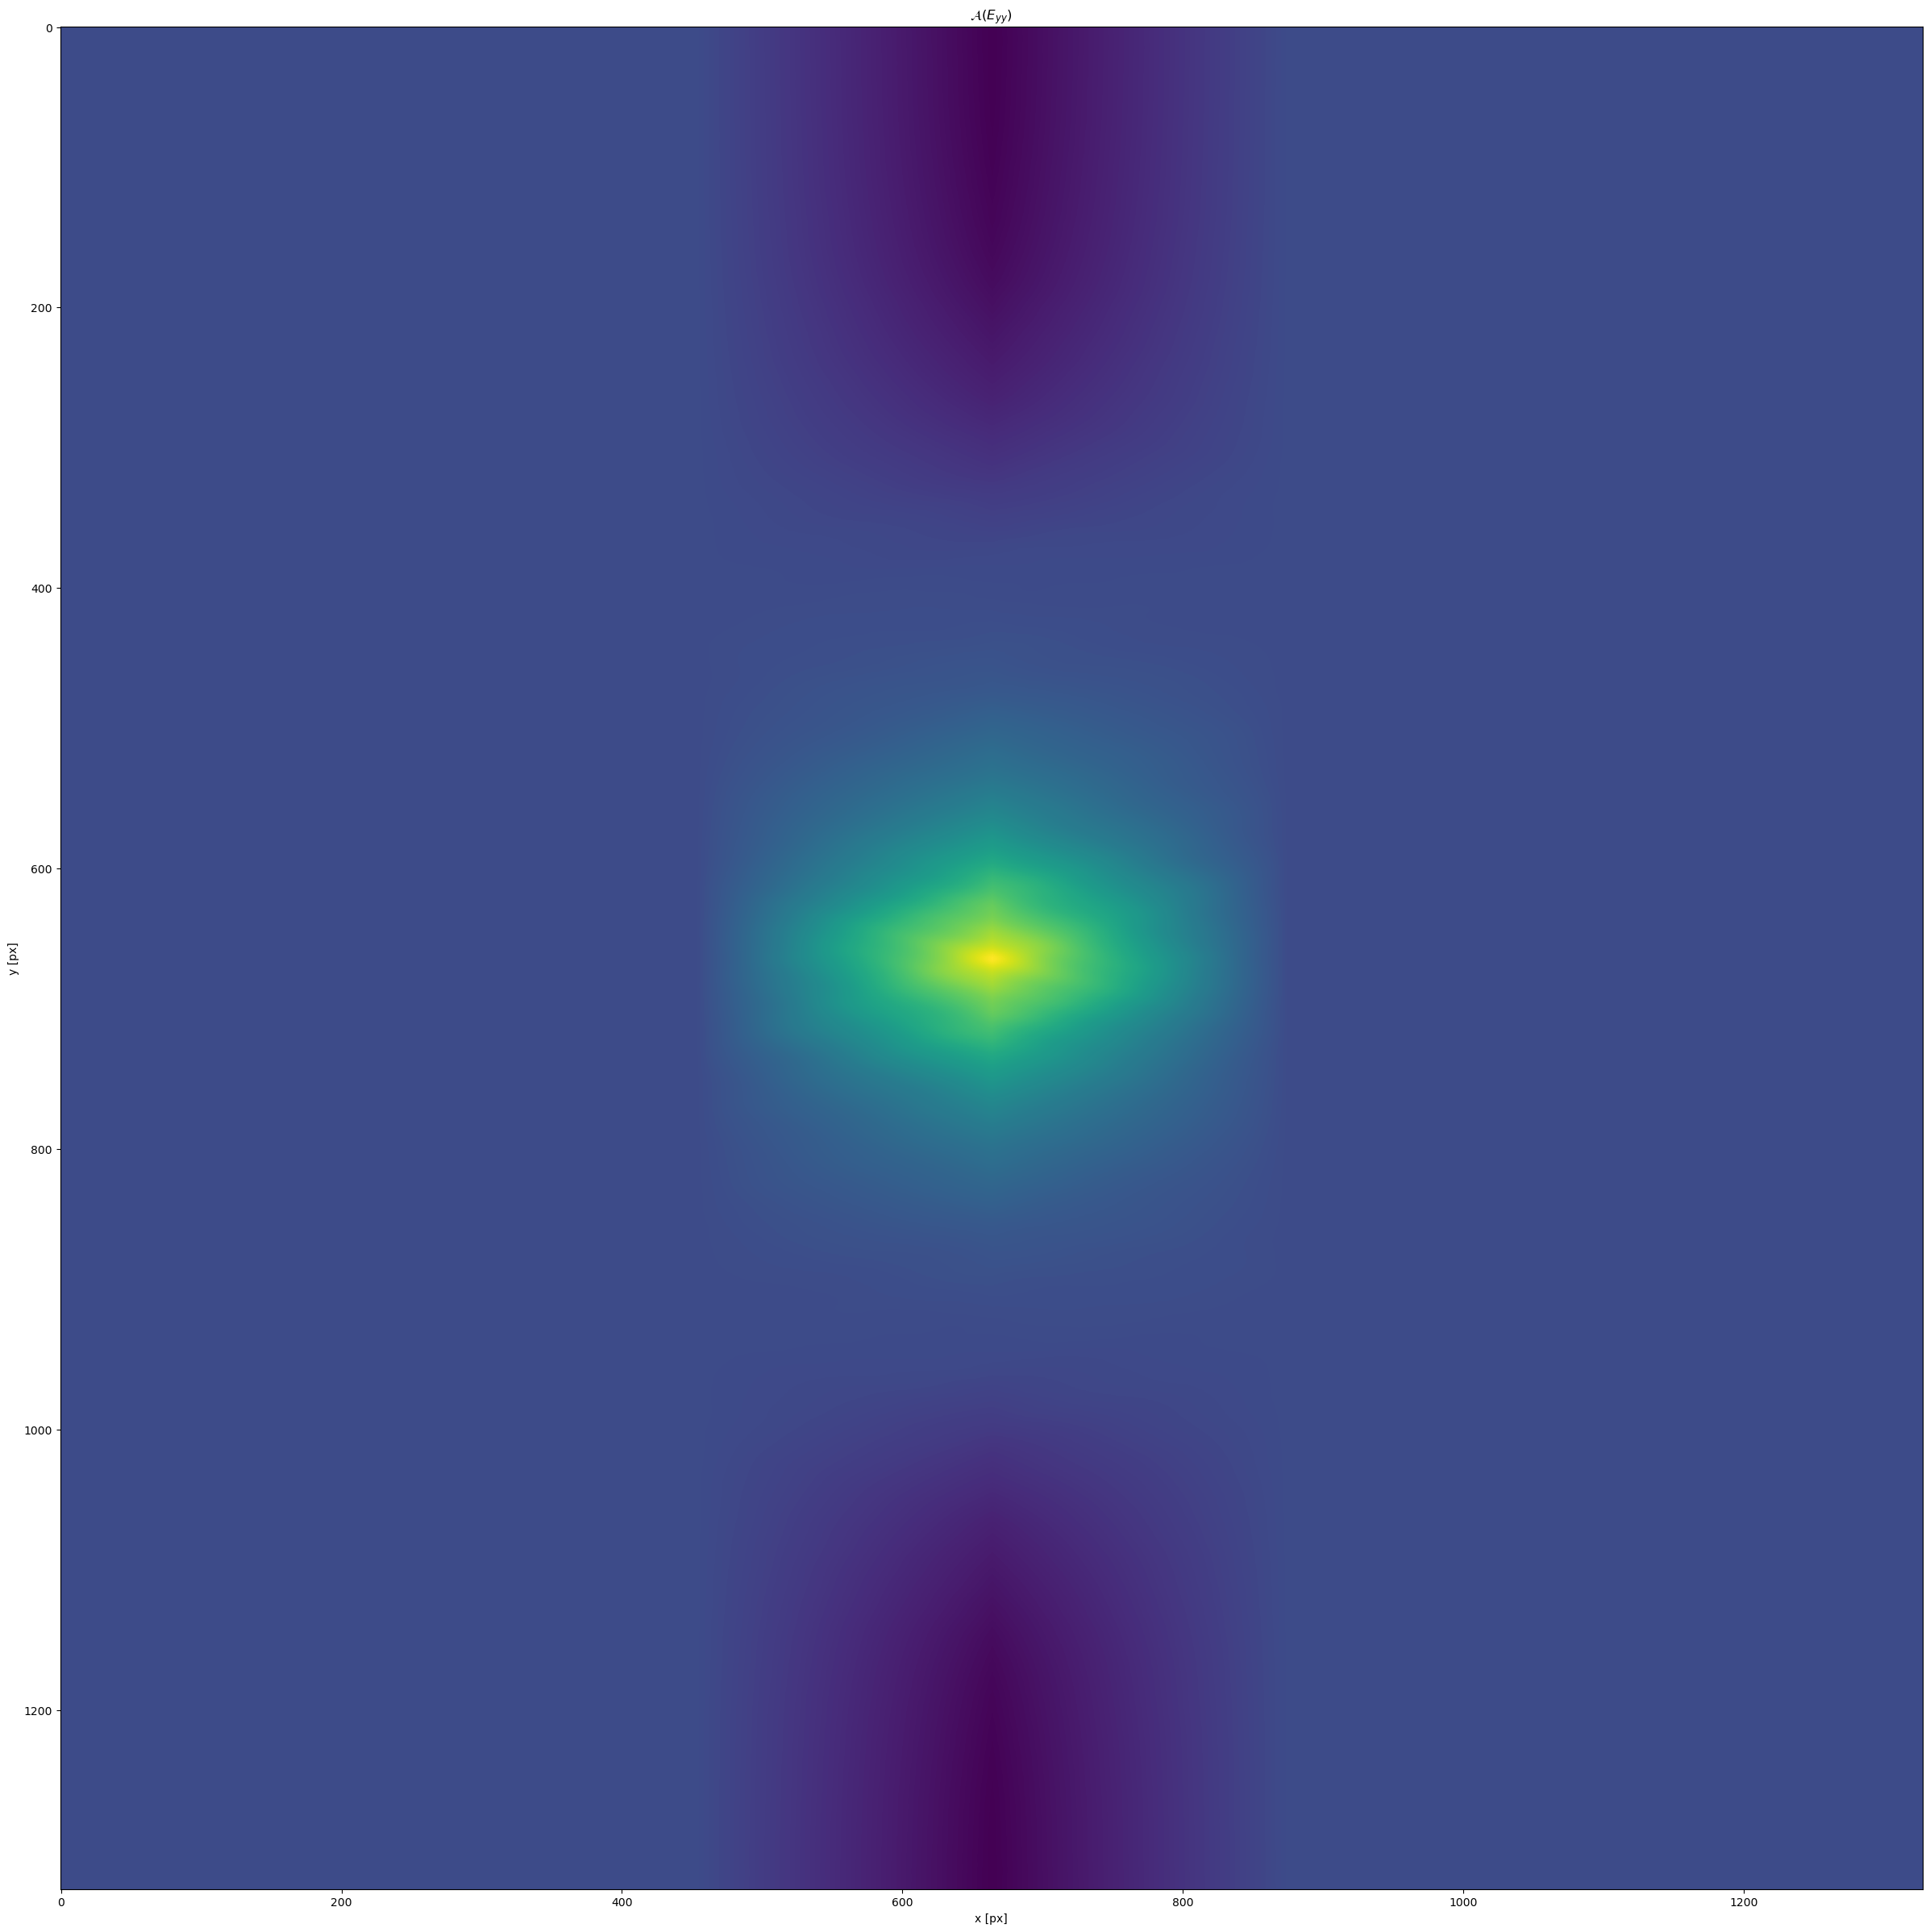

In [6]:
fig = plt.figure(figsize=(30,30))

axe = fig.add_subplot(1, 1, 1)
axe.imshow(auto)
axe.set_xlabel("x [px]")
axe.set_ylabel("y [px]")
axe.set_title("$\mathcal{A}(E_{yy})$")

plt.show()

## Application to the numerical sample

# Computing $C_{\infty}$

In [7]:
def cinf(img: np.ndarray) -> float:
    cinf_ = (1 +(np.power(img.mean(), 2) /np.power(autocorrelation(img), 2).mean())) /2.
    return cinf_

## Application to the experimental sample

In [8]:
print(f"C_inf : {cinf(eyy_img)}")

C_inf : 0.5000995184543467


## Application to the numerical sample

# $C_\infty$ as a free parameter

In [9]:
fcinf = 0.9

## Contour on the experimental sample

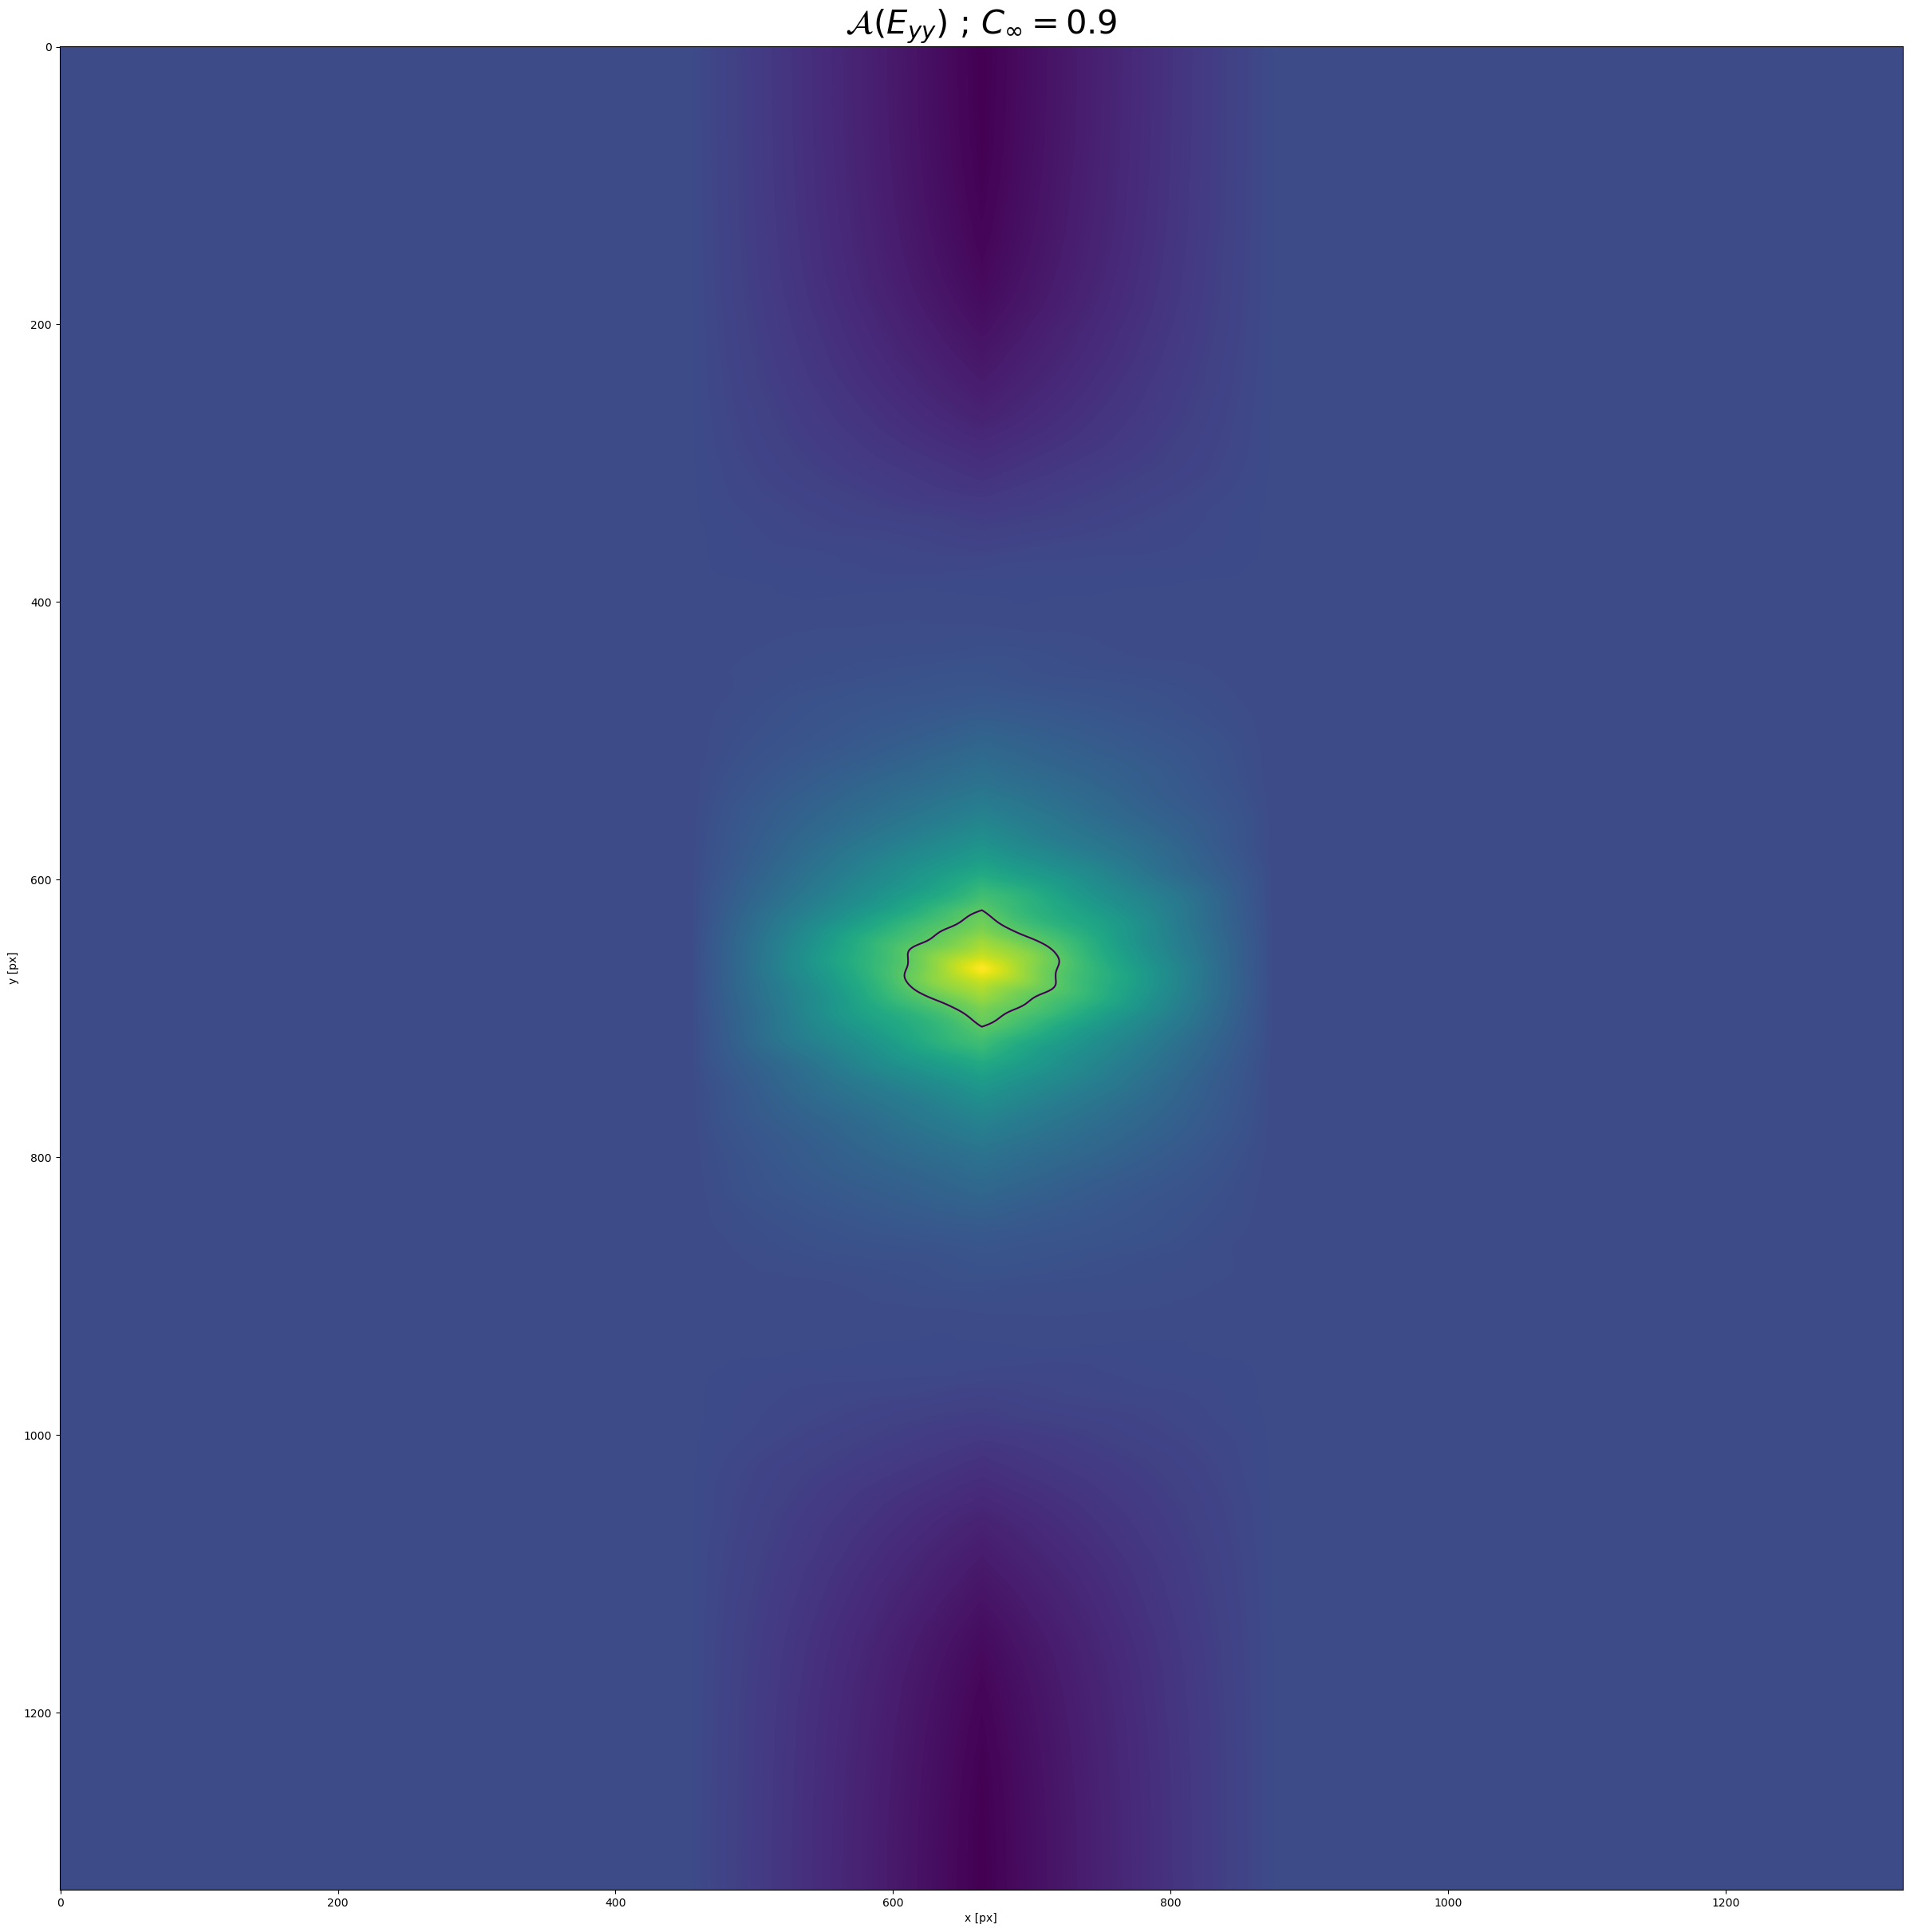

In [10]:
fig = plt.figure(figsize=(30,30))

axe = fig.add_subplot(1, 1, 1)
axe.imshow(auto)
axe.contour(auto, [fcinf, 1.0])
axe.set_xlabel("x [px]")
axe.set_ylabel("y [px]")
axe.set_title("$\mathcal{A}(E_{yy})$ ; $C_\infty =$"+str(fcinf), fontsize=30)
plt.show()

Let see what is the influence of $C_\infty$ on the contour.

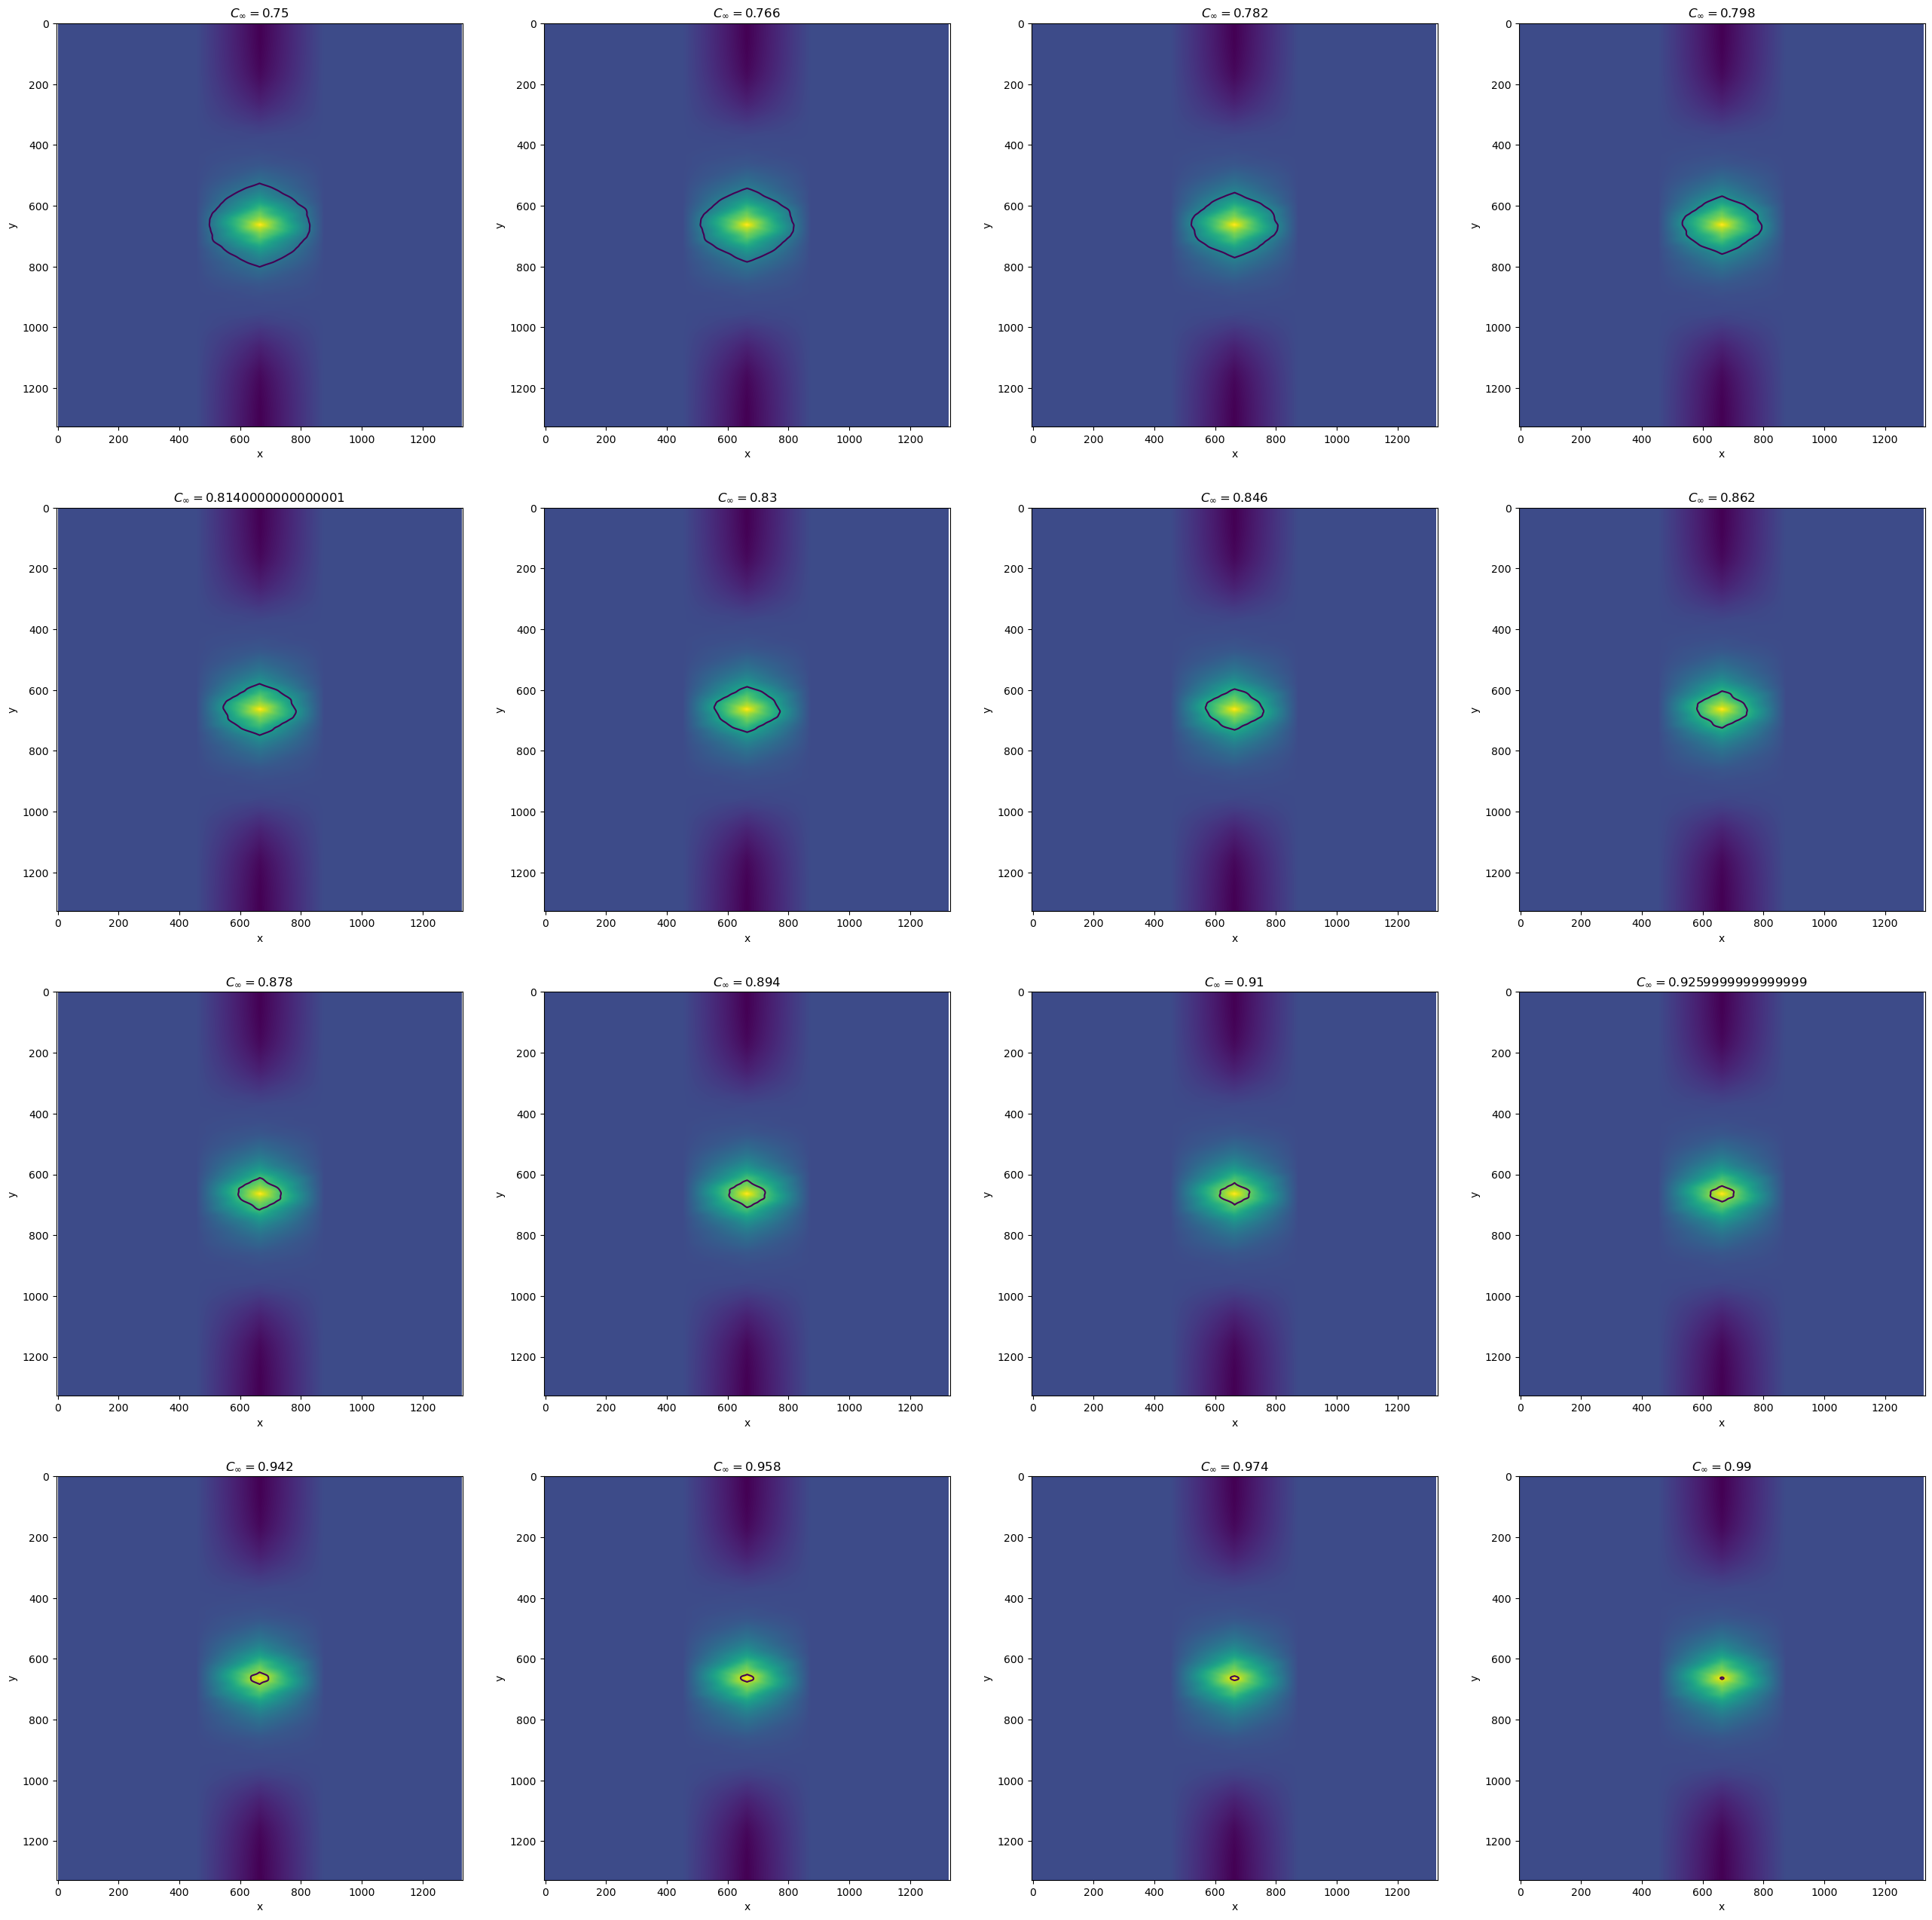

In [11]:
fcinf = np.linspace(0.75, 0.99, 16, endpoint=True)

fig = plt.figure(figsize=(32,32))

for i in range(4):
    for j in range(4):
        axe = fig.add_subplot(4, 4, 4*i+j+1)
        axe.imshow(auto)
        axe.contour(auto, [fcinf[4*i+j], 1.0])
        axe.axis("equal")
        axe.set_xlabel("x")
        axe.set_ylabel("y")
        axe.set_title("$C_\infty =$"+str(fcinf[4*i+j]))

Let zoom in for the $C_\infty = 0.99$.

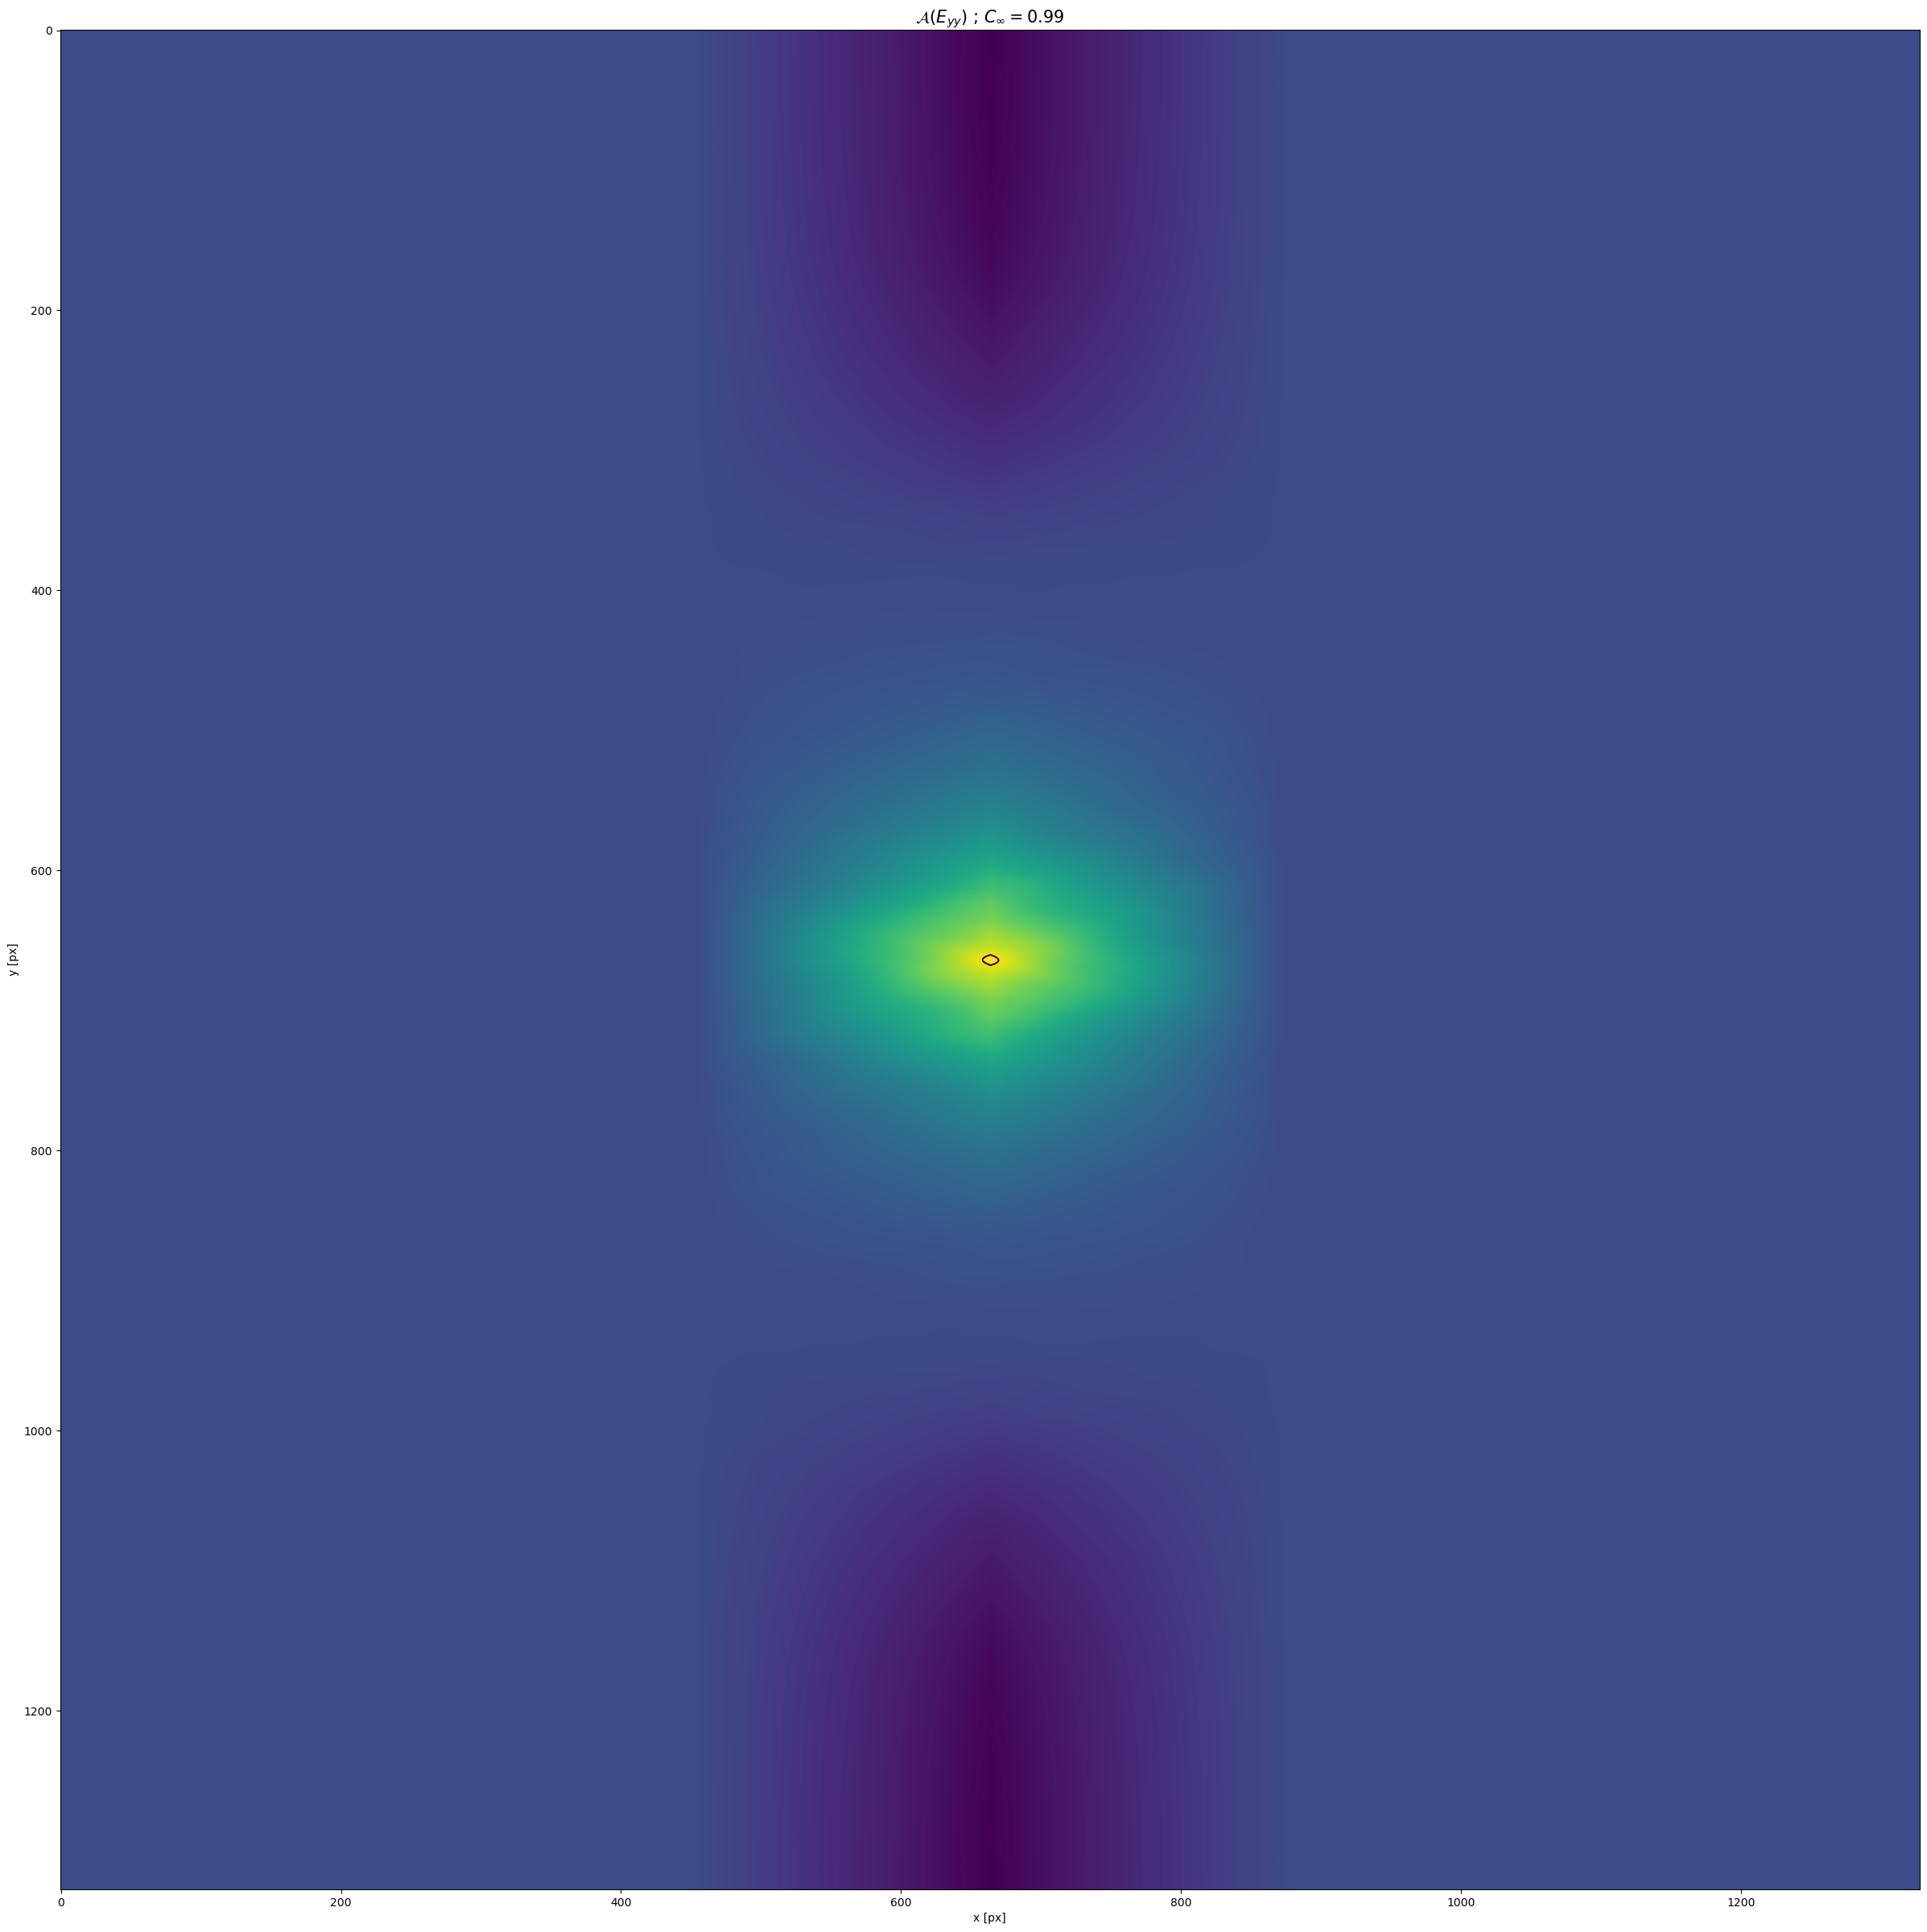

In [12]:
fcinf = 0.99

fig = plt.figure(figsize=(30, 30))

axe = fig.add_subplot(1, 1, 1)
axe.imshow(auto)
axe.contour(auto, [fcinf, 1.0])
axe.set_xlabel("x [px]")
axe.set_ylabel("y [px]")
axe.set_title("$\mathcal{A}(E_{yy})$ ; $C_\infty =$"+str(fcinf), fontsize=15)
plt.show()

It is an almost perfect ellipsoid.

# Computation of the length versus the angle